# Lab 8

## Part One: Binary Classification

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

* Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

* Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

* Report the (cross-validated!) metric.

* Fit the final model.

* Output a confusion matrix.

In [1]:
import pandas as pd
cannabis = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\cannabis_full.csv")

### Q1: LDA

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# filter for sativa and indica
filtered_cannabis = cannabis[cannabis["Type"].isin(["sativa", "indica"])]
filtered_cannabis = filtered_cannabis.dropna()

# encode to have type as numeric values
le = LabelEncoder()
filtered_cannabis["Type_encoded"] = le.fit_transform(filtered_cannabis["Type"])

# variables
X = filtered_cannabis.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = filtered_cannabis["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# pipeline to drop missing values
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

# function for models
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    # grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, target_names= le.classes_)
    return grid_search.best_params_, grid_search.best_score_, conf_matrix, report

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_param_grid = {}
lda_results = evaluate_model(lda_model, lda_param_grid, X_train, y_train, X_test, y_test)

print("LDA Results")
print("Best Hyperparameters:", lda_results[0])
print("Cross-validated accuracy:", lda_results[1])
print("Confusion Matrix:\n", lda_results[2])
print("Classification Report:\n", lda_results[3])

LDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214

LDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214



### Q2: QDA

In [10]:
# qda model

qda_model = QuadraticDiscriminantAnalysis()
qda_param_grid = {}
qda_results = evaluate_model(qda_model, qda_param_grid, X_train, y_train, X_test, y_test)

print("QDA Results")
print("Best Hyperparameters:", qda_results[0])
print("Cross-validated accuracy:", qda_results[1])
print("Confusion Matrix:\n", qda_results[2])
print("Classification Report:\n", qda_results[3])

QDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.4859029927760578
Confusion Matrix:
 [[ 10 122]
 [  5  77]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.67      0.08      0.14       132
      sativa       0.39      0.94      0.55        82

    accuracy                           0.41       214
   macro avg       0.53      0.51      0.34       214
weighted avg       0.56      0.41      0.29       214

QDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.4859029927760578
Confusion Matrix:
 [[ 10 122]
 [  5  77]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.67      0.08      0.14       132
      sativa       0.39      0.94      0.55        82

    accuracy                           0.41       214
   macro avg       0.53      0.51      0.34       214
weighted avg       0.56      0.41      0.29       214



C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Q3: SVC

In [13]:
# svc model

svc_model = SVC(probability=True, random_state=1)
svc_param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf",]
}
svc_results = evaluate_model(svc_model, svc_param_grid, X_train, y_train, X_test, y_test)

print("SVC Results")
print("Best Hyperparameters:", svc_results[0])
print("Cross-validated accuracy:", svc_results[1])
print("Confusion Matrix:\n", svc_results[2])
print("Classification Report:\n", svc_results[3])

SVC Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Cross-validated accuracy: 0.8548675610595116
Confusion Matrix:
 [[122  10]
 [ 18  64]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.92      0.90       132
      sativa       0.86      0.78      0.82        82

    accuracy                           0.87       214
   macro avg       0.87      0.85      0.86       214
weighted avg       0.87      0.87      0.87       214

SVC Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Cross-validated accuracy: 0.8548675610595116
Confusion Matrix:
 [[122  10]
 [ 18  64]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.92      0.90       132
      sativa       0.86      0.78      0.82        82

    accuracy                           0.87       214
   macro avg       0.87      0.85      0.86       214
w

### Q4: SVM

In [19]:
# svm model

svm_model = SVC(kernel='poly', probability=True, random_state=42)
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__degree': [2, 3, 4],
    'classifier__coef0': [0, 1],
}
svm_results = evaluate_model(svm_model, svm_param_grid, X_train, y_train, X_test, y_test)

print("SVM with Polynomial Kernel Results")
print("Best Hyperparameters:", svm_results[0])
print("Cross-validated accuracy:", svm_results[1])
print("Confusion Matrix:\n", svm_results[2])
print("Classification Report:\n", svm_results[3])

SVM with Polynomial Kernel Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 4}
Cross-validated accuracy: 0.8618507051943585
Confusion Matrix:
 [[124   8]
 [ 21  61]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.86      0.94      0.90       132
      sativa       0.88      0.74      0.81        82

    accuracy                           0.86       214
   macro avg       0.87      0.84      0.85       214
weighted avg       0.87      0.86      0.86       214

SVM with Polynomial Kernel Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 4}
Cross-validated accuracy: 0.8618507051943585
Confusion Matrix:
 [[124   8]
 [ 21  61]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.86      0.94      0.90       132
      sativa       0.88      0.74      0.81        82

    accuracy                 

## Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

### Q1: Fit a decision tree, plot the final fit, and interpret the results.


Q1: Decision Tree


Q1: Decision Tree


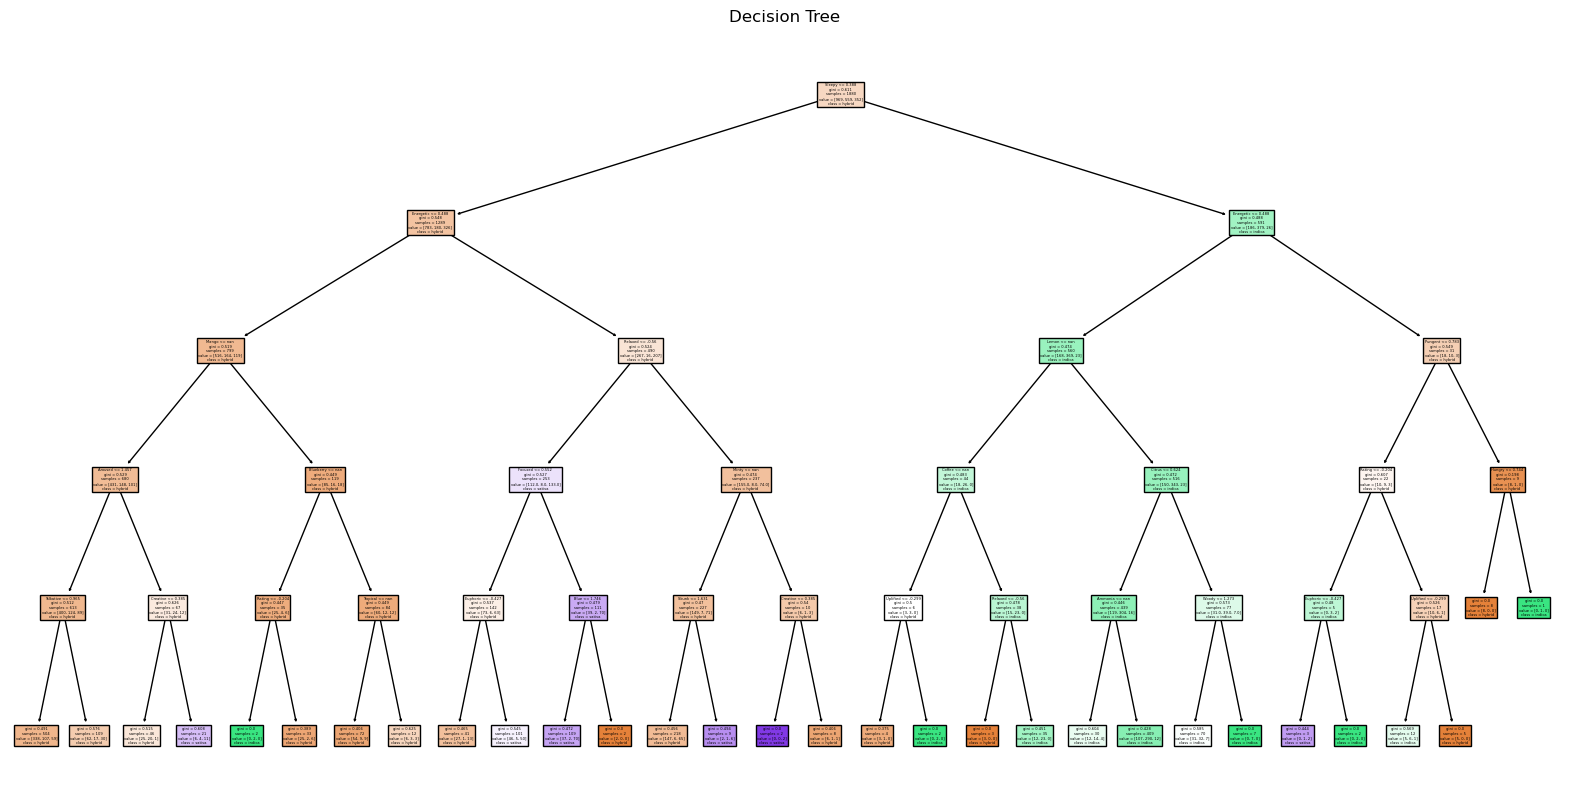

Decision Tree Classification Report:
               precision    recall  f1-score   support

      hybrid       0.63      0.60      0.62       243
      indica       0.61      0.64      0.62       140
      sativa       0.50      0.53      0.52        88

    accuracy                           0.60       471
   macro avg       0.58      0.59      0.58       471
weighted avg       0.60      0.60      0.60       471

Decision Tree Classification Report:
               precision    recall  f1-score   support

      hybrid       0.63      0.60      0.62       243
      indica       0.61      0.64      0.62       140
      sativa       0.50      0.53      0.52        88

    accuracy                           0.60       471
   macro avg       0.58      0.59      0.58       471
weighted avg       0.60      0.60      0.60       471



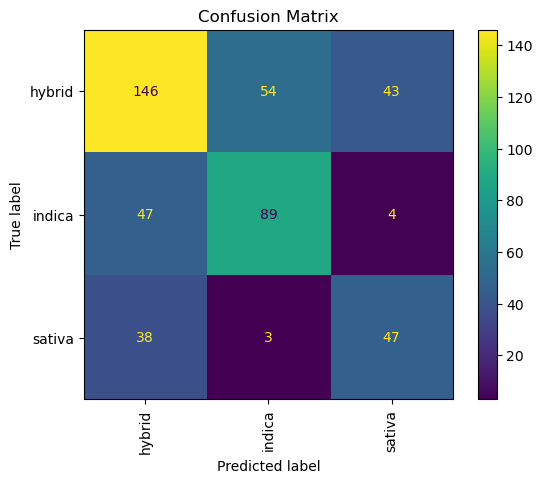

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# encode variable
le = LabelEncoder()
cannabis["Type_encoded"] = le.fit_transform(cannabis["Type"])

# variables
X = cannabis.drop(columns = ["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = cannabis["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

# pipeline
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

# function to plot confusion matrix
def plot_conf_matrix(model, X_test, y_test, labels):
    predictions = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(
        y_test, predictions, display_labels=labels, cmap="viridis", xticks_rotation="vertical"
    )
    plt.title("Confusion Matrix")
    plt.show

def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, labels):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = gridsearch.best-estimator_
    predictions = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=labels)
    return grid_search.best_params_, grid_search.best_score_, conf_matrix, report, best_model

print("\nQ1: Decision Tree")
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
])
tree_model.fit(X_train, y_train)

# decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model.named_steps['classifier'], feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree")
plt.show()

# confusion matrix and report results
plot_conf_matrix(tree_model, X_test, y_test, labels=le.classes_)
tree_predictions = tree_model.predict(X_test)
tree_report = classification_report(y_test, tree_predictions, target_names=le.classes_)
print("Decision Tree Classification Report:\n", tree_report)

### Q2: Repeat the analyses from Part One for LDA, QDA, and KNN.

### Q3: Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

## Part Three: Multiclass from Binary 
Consider two models designed for binary classification: SVC and Logistic Regression.

### Q1: Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:
* Indica vs. Not Indica

* Sativa vs. Not Sativa

* Hybrid vs. Not Hybrid

### Q2: Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

### Q3: Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

* Indica vs. Sativa

* Indica vs. Hybrid

* Hybrid vs. Sativa

### Q4: Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

### Q5: Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach? What about for SVC?